**Importing dependencies and mounting G Drive**

In [3]:
# Import necessary libraries
import sys
print(sys.executable)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import keras.backend as K
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.metrics import AUC

import tensorflow as tf
import os
import glob
#path = r'E:\Large\CATS_DOGS'
path = r'/content/drive/MyDrive/flowers2tt'
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

/usr/bin/python3


**Data Augmentation using Keras's Image Generator**

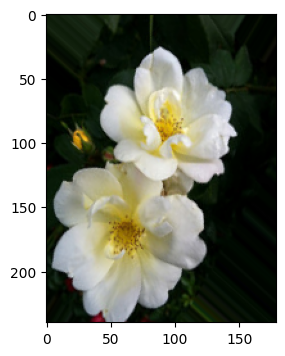

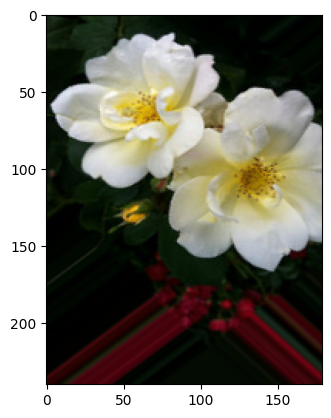

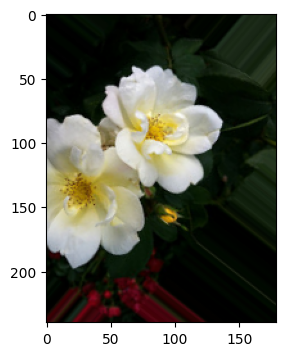

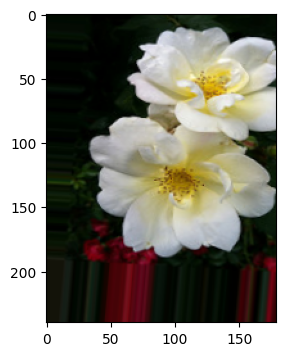

In [5]:
datagen = ImageDataGenerator(
      rotation_range=45, width_shift_range=0.2,
      height_shift_range=0.2, shear_range=0.2,
      zoom_range=0.2, horizontal_flip=True)
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/flowers2tt/TRAIN/rose/10090824183_d02c613f10_m.jpg')
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.imshow(img)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i, figsize=(4,4))
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

**Building a basic CNN model with 3 Conv2D layers**

In [6]:
# Initialising the CNN
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

classifier.add(Conv2D(64, (3, 3), activation='relu'))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',AUC()])

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 215296)            0         
                                                                 
 dense (Dense)               (None, 128)               27558016  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 27586785 (105.24 MB)
Trainable params: 275

In [8]:
# Part 2 - Fitting the CNN to the images
K.clear_session()

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory('/content/drive/MyDrive/flowers2tt/TRAIN',
                        target_size = (64, 64),batch_size = 32, class_mode = 'binary')

test_gen = test_datagen.flow_from_directory('/content/drive/MyDrive/flowers2tt/TEST',
                        target_size = (64, 64), batch_size = 32, class_mode = 'binary', shuffle=False)

Found 1384 images belonging to 2 classes.
Found 365 images belonging to 2 classes.


In [9]:
print(train_gen.class_indices)

{'rose': 0, 'tulip': 1}


In [10]:
##steps_per_epoch = 8000, validation_steps = 200
hist = classifier.fit(train_gen, epochs =10, validation_data = test_gen)

Epoch 1/10
44/44 [==============================] - 501s 11s/step - loss: 0.8774 - accuracy: 0.5860 - auc: 0.6073 - val_loss: 0.6978 - val_accuracy: 0.5644 - val_auc: 0.6844
Epoch 2/10
44/44 [==============================] - 11s 249ms/step - loss: 0.6471 - accuracy: 0.6366 - auc: 0.6652 - val_loss: 0.6894 - val_accuracy: 0.5699 - val_auc: 0.6985
Epoch 3/10
44/44 [==============================] - 12s 272ms/step - loss: 0.6140 - accuracy: 0.6640 - auc: 0.7117 - val_loss: 0.6967 - val_accuracy: 0.6110 - val_auc: 0.6989
Epoch 4/10
44/44 [==============================] - 11s 249ms/step - loss: 0.6068 - accuracy: 0.6777 - auc: 0.7265 - val_loss: 0.7590 - val_accuracy: 0.5699 - val_auc: 0.7151
Epoch 5/10
44/44 [==============================] - 11s 241ms/step - loss: 0.5696 - accuracy: 0.6908 - auc: 0.7656 - val_loss: 0.6213 - val_accuracy: 0.6438 - val_auc: 0.7261
Epoch 6/10
44/44 [==============================] - 11s 250ms/step - loss: 0.5315 - accuracy: 0.7211 - auc: 0.8015 - val_loss:

In [11]:
yt_prob = classifier.predict(test_gen)
yt_pred = np.where(yt_prob>=0.5,1,0)
y_test = test_gen.classes

12/12 [==============================] - 2s 155ms/step


In [12]:
confusion_matrix(y_test, yt_pred)

array([[136,  47],
       [ 74, 108]])

In [13]:
accuracy_score(y_test, yt_pred)

0.6684931506849315

In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [15]:
roc_auc_score(y_test,yt_pred)

0.6682879961568486

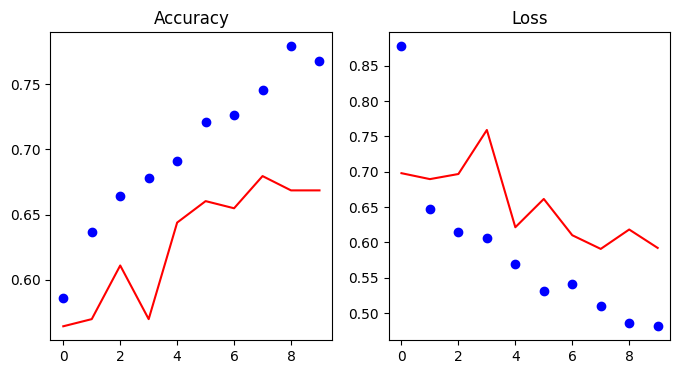

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

In [17]:
# Calculate ROC curve and ROC area under the curve

fpr, tpr, thresholds = roc_curve(y_test,yt_prob)
roc_auc = auc(fpr,tpr)

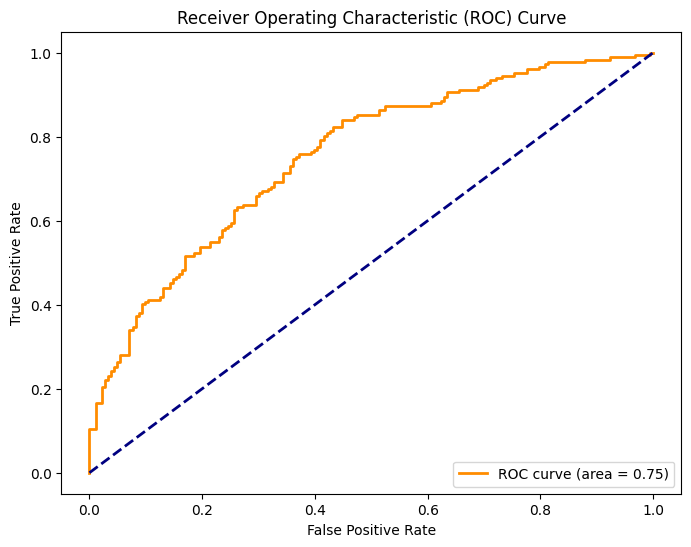

In [18]:
# ROC plot

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

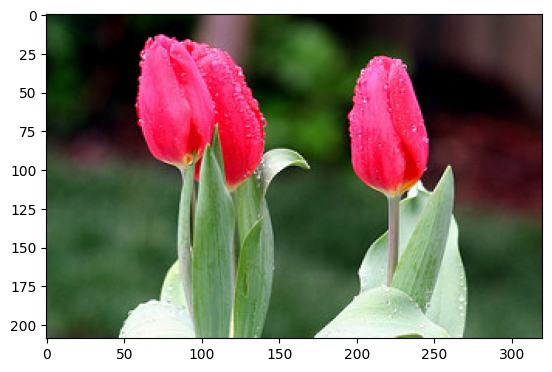

In [19]:
from tensorflow.keras.utils import load_img
test_image = load_img('/content/drive/MyDrive/flowers2tt/CHECK/100930342_92e8746431_n.jpg')
plt.imshow(test_image)
plt.show()

In [20]:
train_gen.class_indices.keys()

dict_keys(['rose', 'tulip'])

In [21]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('/content/drive/MyDrive/flowers2tt/CHECK/100930342_92e8746431_n.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

if result[0][0] <= 0.5:
    prediction = 'rose'
else:
    prediction = 'tulip'

print('Prediction: ', prediction)

1/1 [==============================] - 0s 257ms/step
Prediction:  tulip


In [22]:
result

array([[1.]], dtype=float32)

Predicting the type of all the flowers in the directory "CHECK"

In [23]:
check_directory = '/content/drive/MyDrive/flowers2tt/CHECK'

In [24]:
image_files = [os.path.join(check_directory, file) for file in os.listdir(check_directory) if file.endswith(('.jpg', '.jpeg', '.png'))]

In [25]:
images = []
for img_path in image_files:
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    images.append(img_array)

In [26]:
# stacking the images into a single numpy array
images = np.vstack(images)

In [27]:
# make predictions
predictions = classifier.predict(images)

1/1 [==============================] - 0s 261ms/step


In [28]:
# convert predictions to labels (dichotomous classification)
predicted_labels = ['rose' if pred <= 0.5 else 'tulip' for pred in predictions]

In [29]:
# display the predicted labels

for img_path, label in zip(image_files, predicted_labels):
    print(f'{img_path} - Predicted Label: {label}')

/content/drive/MyDrive/flowers2tt/CHECK/118974357_0faa23cce9_n.jpg - Predicted Label: rose
/content/drive/MyDrive/flowers2tt/CHECK/10791227_7168491604.jpg - Predicted Label: tulip
/content/drive/MyDrive/flowers2tt/CHECK/11746080_963537acdc.jpg - Predicted Label: tulip
/content/drive/MyDrive/flowers2tt/CHECK/174109630_3c544b8a2f.jpg - Predicted Label: rose
/content/drive/MyDrive/flowers2tt/CHECK/38287568_627de6ca20.jpg - Predicted Label: tulip
/content/drive/MyDrive/flowers2tt/CHECK/102501987_3cdb8e5394_n.jpg - Predicted Label: rose
/content/drive/MyDrive/flowers2tt/CHECK/160954292_6c2b4fda65_n.jpg - Predicted Label: rose
/content/drive/MyDrive/flowers2tt/CHECK/295257304_de893fc94d.jpg - Predicted Label: tulip
/content/drive/MyDrive/flowers2tt/CHECK/229488796_21ac6ee16d_n.jpg - Predicted Label: tulip
/content/drive/MyDrive/flowers2tt/CHECK/11746452_5bc1749a36.jpg - Predicted Label: tulip
/content/drive/MyDrive/flowers2tt/CHECK/11746276_de3dec8201.jpg - Predicted Label: tulip
/content/dr